# 1. Exploração e limpeza das bases de dados 

In [1]:
# importacao das dependencias
import pandas as pd
import numpy as np


## Base de dados Falhas


In [2]:
# Leitura da base de daddos falhas
df_falhas = pd.read_csv('FALHAS.csv')
df_falhas

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
0,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta dianteira Folga (Ajuste),09-01-2023 22:24:44
1,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta traseira Folga (Ajuste),09-01-2023 22:25:02
2,2023-4130482,AUDI Q3,2Y2Y,DSN,PCEQS999,2054701,ESPC,Lanterna tras (09) Interfere,10-01-2023 09:18:25
3,2023-4130482,AUDI Q3,2Y2Y,DSN,PCEQS999,2054701,ESPC,Emblema / logo - Adesivos em geral Solto(a) ¨,10-01-2023 09:18:40
4,2023-4130664,AUDI Q3,6Y6Y,DSN,PCEQS805,7000240,ZP82,Painel instrumentos Ruído (-),10-01-2023 11:17:56
...,...,...,...,...,...,...,...,...,...
992715,2024-2556363,T-CROSS,6UA1,CWL,SMT2,FHQWRAP,ZP8,FAROL (09) PEÇA INCORRETA ¨,25-06-2024 13:09:25
992716,2024-2556363,T-CROSS,6UA1,CWL,SMT2,FHQWRAP,ZP8,SMART INSPECTION PEÇA NOK,25-06-2024 13:09:25
992717,2024-2546444,T-CROSS,2R2R,DHS,SMT2,FHQWRAP,ZP8,SMART INSPECTION PEÇA NOK,25-06-2024 13:10:35
992718,2024-2546444,T-CROSS,2R2R,DHS,SMT2,FHQWRAP,ZP8,FAROL DE NEBLINA (09) PEÇA INCORRETA ¨,25-06-2024 13:10:35


In [3]:
# Visualizacao da forma da base de dados para saber com que estamos lidando
df_falhas.shape

(992720, 9)

In [4]:
# Para saber que os dados que estao dispostos para trabalharmos
df_falhas.columns

Index(['KNR', 'MODELO', 'COR', 'MOTOR', 'ESTACAO', 'USUARIO', 'HALLE', 'FALHA',
       'DATA'],
      dtype='object')

In [5]:
# Saber os tipos de cada coluna para ter nocao do que vamos lidar 
df_falhas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992720 entries, 0 to 992719
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   KNR      992720 non-null  object
 1   MODELO   992720 non-null  object
 2   COR      992720 non-null  object
 3   MOTOR    992720 non-null  object
 4   ESTACAO  992707 non-null  object
 5   USUARIO  992707 non-null  object
 6   HALLE    990868 non-null  object
 7   FALHA    992710 non-null  object
 8   DATA     992720 non-null  object
dtypes: object(9)
memory usage: 68.2+ MB


In [6]:
# Ter informacoes de quais dados sao nulos e sua quantidade para saber quatos irao ser descartados
df_falhas.isna().sum()

KNR           0
MODELO        0
COR           0
MOTOR         0
ESTACAO      13
USUARIO      13
HALLE      1852
FALHA        10
DATA          0
dtype: int64

In [7]:
# visualizar quais modelos estao dispostos na base de dados 
df_falhas['MODELO'].value_counts()

MODELO
T-CROSS       986064
T-CROSS PA      3439
AUDI Q3         3217
Name: count, dtype: int64

In [8]:
# Limpar a base de dados para excluir todos os campos que estao vazios
df_falhas_limpa = df_falhas.dropna()
# df_falhas_limpa.shape()
df_falhas_limpa.shape

(990858, 9)

Com a remoção dos dados vazios houve foi deletado 1862 dados da tabela

In [9]:
# Ter mais informacoes sobre como os dados estao organizados em seus tipos
df_falhas_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990858 entries, 0 to 992719
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   KNR      990858 non-null  object
 1   MODELO   990858 non-null  object
 2   COR      990858 non-null  object
 3   MOTOR    990858 non-null  object
 4   ESTACAO  990858 non-null  object
 5   USUARIO  990858 non-null  object
 6   HALLE    990858 non-null  object
 7   FALHA    990858 non-null  object
 8   DATA     990858 non-null  object
dtypes: object(9)
memory usage: 75.6+ MB


In [10]:
# Pegar somente os dados do tipo T-Cross, pois sera o foco da analise
df_falhas_limpa = df_falhas_limpa[df_falhas_limpa['MODELO'] == 'T-CROSS']
df_falhas_limpa['MODELO'].unique()

array(['T-CROSS'], dtype=object)

In [11]:
# Visualizar quantos tipos de falhas diferentes há na base de dados
total_falhas = df_falhas_limpa['FALHA'].unique()
len(total_falhas)


7196

In [12]:
# Visualizar qual tipo de falha é a mais comum 
df_falhas_limpa['FALHA'].value_counts()

FALHA
Painel lateral Sujeira na pintura                              30645
Painel lateral 04. Caroço / Pico                               27467
PAINEL LATERAL 05. SUJEIRA NA PINTURA                          20483
Painel lateral 01. Amassado                                    15979
Painel lateral 05. Sujeira na pintura                          15126
                                                               ...  
Teclas do volante Função NOK                                       1
TECLAS DO VOLANTE FUNÇÃO NOK                                       1
Chapa defletora de calor Montagem NOK                              1
Buzina do alarme & Peça NOK                                        1
CABO VÍDEO CÂMERA DE RÉ (56/5F)(6C) CONECTOR DANIFICADO (&)        1
Name: count, Length: 7196, dtype: int64

In [13]:
# 
df_falhas_limpa = df_falhas_limpa.drop(['MODELO','DATA'], axis='columns')
df_falhas_limpa

,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA
0,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta dianteira Folga (Ajuste)
1,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta traseira Folga (Ajuste)
17,2023-0616455,0Q0Q,CWS,PCEQS100,4004672,ZP5,Painel lateral 04. Caroço / Pico
18,2023-0616455,0Q0Q,CWS,PCEQS100,4004672,ZP5,Painel lateral 01. Amassado
20,2023-0616455,0Q0Q,CWS,PCEQS102,4005127,ZP5,Painel lateral 01. Amassado
...,...,...,...,...,...,...,...
992715,2024-2556363,6UA1,CWL,SMT2,FHQWRAP,ZP8,FAROL (09) PEÇA INCORRETA ¨
992716,2024-2556363,6UA1,CWL,SMT2,FHQWRAP,ZP8,SMART INSPECTION PEÇA NOK
992717,2024-2546444,2R2R,DHS,SMT2,FHQWRAP,ZP8,SMART INSPECTION PEÇA NOK
992718,2024-2546444,2R2R,DHS,SMT2,FHQWRAP,ZP8,FAROL DE NEBLINA (09) PEÇA INCORRETA ¨


In [14]:
# Colcoa todas as letras em maiuscula para que possa pegar tdoos os dados repetidos
df_falhas_limpa['FALHA'] = df_falhas_limpa['FALHA'].str.upper()
df_falhas_limpa

,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA
0,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,PORTA DIANTEIRA FOLGA (AJUSTE)
1,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,PORTA TRASEIRA FOLGA (AJUSTE)
17,2023-0616455,0Q0Q,CWS,PCEQS100,4004672,ZP5,PAINEL LATERAL 04. CAROÇO / PICO
18,2023-0616455,0Q0Q,CWS,PCEQS100,4004672,ZP5,PAINEL LATERAL 01. AMASSADO
20,2023-0616455,0Q0Q,CWS,PCEQS102,4005127,ZP5,PAINEL LATERAL 01. AMASSADO
...,...,...,...,...,...,...,...
992715,2024-2556363,6UA1,CWL,SMT2,FHQWRAP,ZP8,FAROL (09) PEÇA INCORRETA ¨
992716,2024-2556363,6UA1,CWL,SMT2,FHQWRAP,ZP8,SMART INSPECTION PEÇA NOK
992717,2024-2546444,2R2R,DHS,SMT2,FHQWRAP,ZP8,SMART INSPECTION PEÇA NOK
992718,2024-2546444,2R2R,DHS,SMT2,FHQWRAP,ZP8,FAROL DE NEBLINA (09) PEÇA INCORRETA ¨


In [15]:
# Visualizando o total de falhas diferentes presentes na tabela

total_falhas = df_falhas_limpa['FALHA'].unique()
len(total_falhas)

4271

In [16]:
# Visualização de dados duplicados
df_falhas_limpa[df_falhas_limpa['KNR'] == '2024-0626325']

,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA
534973,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,PAINEL LATERAL RISCO
534974,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,PAINEL LATERAL RISCO
534981,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,PAINEL LATERAL MARCA DE POLIMENTO
534982,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,PAINEL LATERAL MARCA DE POLIMENTO
534999,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,TAMPA TRASEIRA FALTA TINTA
535000,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,TAMPA TRASEIRA FALTA TINTA
535005,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,TAMPA TRASEIRA 02. ONDULAÇÃO
535006,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,TAMPA TRASEIRA 02. ONDULAÇÃO
535009,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,TAMPA TRASEIRA 02. ONDULAÇÃO
535010,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,TAMPA TRASEIRA 02. ONDULAÇÃO


In [17]:
# Verificando os dados que tem falhas repetidas nesse KNR
df_falhas_limpa[df_falhas_limpa['KNR'] == '2024-0626324']

,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA
542602,2024-0626324,2R2R,CWL,HCEQS655,2048515,ZP7,ILUMINAÇÃO CENTRAL INTERNA (09) AJUSTE INCORRETO
542603,2024-0626324,2R2R,CWL,HCEQS655,2048515,ZP7,ILUMINAÇÃO CENTRAL INTERNA (09) AJUSTE INCORRETO


In [18]:
# Elimina os dados repetidos

df_falhas_limpa = df_falhas_limpa.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_falhas_limpa = df_falhas_limpa.astype(str)
df_falhas_limpa = df_falhas_limpa.drop_duplicates()

In [19]:
# Verificando se os dados repetidos foram elimniados
df_falhas_limpa[df_falhas_limpa['KNR'] == '2024-0626325']

,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA
534973,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,PAINEL LATERAL RISCO
534981,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,PAINEL LATERAL MARCA DE POLIMENTO
534999,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,TAMPA TRASEIRA FALTA TINTA
535005,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,TAMPA TRASEIRA 02. ONDULAÇÃO
535017,2024-0626325,2RA1,CWL,HCEQS506,1984195,ZP7,PAINEL LATERAL SUJEIRA DE CERA


In [20]:
# Verificando se o KNR acima aborado foi eliminado os dados repetidos
df_falhas_limpa[df_falhas_limpa['KNR'] == '2024-0626324']

,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA
542602,2024-0626324,2R2R,CWL,HCEQS655,2048515,ZP7,ILUMINAÇÃO CENTRAL INTERNA (09) AJUSTE INCORRETO


In [21]:
# Verificando o tamanho da base de dados
df_falhas_limpa.shape

(667676, 7)

In [22]:
# Colunas que não serão utilizadas no modelo
lixo = {"COR", "MOTOR","ESTACAO", "USUARIO", "HALLE" }
df_falhas_limpa.drop(columns=lixo)



,KNR,FALHA
0,2023-1326197,PORTA DIANTEIRA FOLGA (AJUSTE)
1,2023-1326197,PORTA TRASEIRA FOLGA (AJUSTE)
17,2023-0616455,PAINEL LATERAL 04. CAROÇO / PICO
18,2023-0616455,PAINEL LATERAL 01. AMASSADO
20,2023-0616455,PAINEL LATERAL 01. AMASSADO
...,...,...
992715,2024-2556363,FAROL (09) PEÇA INCORRETA ¨
992716,2024-2556363,SMART INSPECTION PEÇA NOK
992717,2024-2546444,SMART INSPECTION PEÇA NOK
992718,2024-2546444,FAROL DE NEBLINA (09) PEÇA INCORRETA ¨


## Base de dados Resultados 


In [26]:
# Leitura de duas bases de resultados 
df_resultados = pd.read_csv('RESULTADOS_04_06_2024_full_teste.csv', compression='gzip')
df_resultados2 = pd.read_csv('RESULTADOS_02_03_2024_full_teste.csv', compression='gzip')

df_resultados

,Unnamed: 0,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
0,0,2023-2056234,012001,1,10,NaN,NaN,NaN,2024-05-16 13:41:25
1,1,2023-2056234,012002,1,10,NaN,NaN,NaN,2024-05-16 14:12:35
2,2,2023-2056234,012003,1,10,NaN,NaN,NaN,2024-05-16 14:12:27
3,3,2023-2056234,012004,1,10,NaN,NaN,NaN,2024-05-16 14:11:07
4,4,2023-2056234,012008,1,10,NaN,NaN,NaN,2024-05-16 14:13:07
...,...,...,...,...,...,...,...,...,...
21674247,21674247,2024-2976013,720100,2,10,Nm,2.0,10.09 ...,2024-05-21 14:33:38
21674248,21674248,2024-2976013,720200,2,10,Grad,1.0,11.7 ...,2024-05-21 14:33:38
21674249,21674249,2024-2976013,720200,2,10,Grad,3.0,17.4 ...,2024-05-21 14:33:38
21674250,21674250,2024-2976013,720200,2,10,Nm,0.0,10.07 ...,2024-05-21 14:33:38


In [27]:
# Junção da base de dados Resultados para conter mais dados para validação do modelo 
df_resultados = pd.concat([df_resultados, df_resultados2])

In [28]:
# Eliminando colunas desnecessárias para o modelo
df_resultados_limpa = df_resultados.drop(['Unnamed: 0'], axis='columns')
df_resultados_limpa

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
0,2023-2056234,012001,1,10,NaN,NaN,NaN,2024-05-16 13:41:25
1,2023-2056234,012002,1,10,NaN,NaN,NaN,2024-05-16 14:12:35
2,2023-2056234,012003,1,10,NaN,NaN,NaN,2024-05-16 14:12:27
3,2023-2056234,012004,1,10,NaN,NaN,NaN,2024-05-16 14:11:07
4,2023-2056234,012008,1,10,NaN,NaN,NaN,2024-05-16 14:13:07
...,...,...,...,...,...,...,...,...
11099103,2024-2016184,720100,2,10,Nm,2.0,10.06 ...,2024-03-21 17:48:53
11099104,2024-2016184,720200,2,10,Grad,1.0,21 ...,2024-03-21 17:48:53
11099105,2024-2016184,720200,2,10,Grad,3.0,27.8 ...,2024-03-21 17:48:53
11099106,2024-2016184,720200,2,10,Nm,0.0,10.02 ...,2024-03-21 17:48:53


In [29]:
# Agrupando por KNR e contando quantos há
df_resultados_limpa.groupby("KNR").count()


,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
KNR,,,,,,,
2023-2056234,874,874,874,846,846,846,874
2023-5076008,3,3,3,3,3,3,3
2023-5076015,2,2,2,2,2,2,2
2024-0516009,56,56,56,48,56,48,56
2024-0526019,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
2024-2976009,72,72,72,72,72,72,72
2024-2976010,72,72,72,72,72,72,72
2024-2976011,74,74,74,74,74,74,74


In [30]:
# Criando uma nova tabalea a partir da df_falhas_limpa
df_falhas_limpa_true = df_falhas_limpa
df_falhas_limpa_true


,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA
0,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,PORTA DIANTEIRA FOLGA (AJUSTE)
1,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,PORTA TRASEIRA FOLGA (AJUSTE)
17,2023-0616455,0Q0Q,CWS,PCEQS100,4004672,ZP5,PAINEL LATERAL 04. CAROÇO / PICO
18,2023-0616455,0Q0Q,CWS,PCEQS100,4004672,ZP5,PAINEL LATERAL 01. AMASSADO
20,2023-0616455,0Q0Q,CWS,PCEQS102,4005127,ZP5,PAINEL LATERAL 01. AMASSADO
...,...,...,...,...,...,...,...
992715,2024-2556363,6UA1,CWL,SMT2,FHQWRAP,ZP8,FAROL (09) PEÇA INCORRETA ¨
992716,2024-2556363,6UA1,CWL,SMT2,FHQWRAP,ZP8,SMART INSPECTION PEÇA NOK
992717,2024-2546444,2R2R,DHS,SMT2,FHQWRAP,ZP8,SMART INSPECTION PEÇA NOK
992718,2024-2546444,2R2R,DHS,SMT2,FHQWRAP,ZP8,FAROL DE NEBLINA (09) PEÇA INCORRETA ¨


In [31]:
# Preenchendo os resultados nulos por 0
df_falhas_limpa_true_filled = df_falhas_limpa_true.fillna(0)

# Transforma os valores não nulos para 1
df_falhas_limpa_true_filled[df_falhas_limpa_true_filled != 0] = 1

In [32]:
# Transformando a coluna DATA para o tipo datatime 
df_resultados_limpa['DATA'] = pd.to_datetime(df_resultados_limpa['DATA'], errors='coerce')
df_resultados_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32773360 entries, 0 to 11099107
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   KNR       object        
 1   NAME      object        
 2   ID        int64         
 3   STATUS    int64         
 4   UNIT      object        
 5   VALUE_ID  float64       
 6   VALUE     object        
 7   DATA      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.2+ GB


In [33]:

df_resultados_limpa['DATA'] = pd.to_datetime(df_resultados_limpa['DATA'], errors='coerce')

In [34]:
# Verificando a tabela de resultados apósa limpeza
df_resultados_limpa

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
0,2023-2056234,012001,1,10,NaN,NaN,NaN,2024-05-16 13:41:25
1,2023-2056234,012002,1,10,NaN,NaN,NaN,2024-05-16 14:12:35
2,2023-2056234,012003,1,10,NaN,NaN,NaN,2024-05-16 14:12:27
3,2023-2056234,012004,1,10,NaN,NaN,NaN,2024-05-16 14:11:07
4,2023-2056234,012008,1,10,NaN,NaN,NaN,2024-05-16 14:13:07
...,...,...,...,...,...,...,...,...
11099103,2024-2016184,720100,2,10,Nm,2.0,10.06 ...,2024-03-21 17:48:53
11099104,2024-2016184,720200,2,10,Grad,1.0,21 ...,2024-03-21 17:48:53
11099105,2024-2016184,720200,2,10,Grad,3.0,27.8 ...,2024-03-21 17:48:53
11099106,2024-2016184,720200,2,10,Nm,0.0,10.02 ...,2024-03-21 17:48:53


In [35]:
# Função responsável por transformar os dados 
def aggregate_by_id(df, id_value):
    subset = df[df['ID'] == id_value]
    return subset.groupby('KNR').agg(
        NAME=('NAME', 'count'),  # Conta total de NAME
        SOK=('STATUS', lambda x: (x == 10).sum()),
        SNOK=('STATUS', lambda x: (x == 13).sum()),
        DATA=('DATA', lambda x: (x.max() - x.min()).total_seconds() / (3600*24))
    ).rename(columns={
        'NAME': f'ID{id_value}NAME',
        'SOK': f'ID{id_value}SOK',
        'SNOK': f'ID{id_value}SNOK',
        'DATA': f'ID{id_value}DATA'
    })

# Agregando para cada ID
id1 = aggregate_by_id(df_resultados_limpa, 1)
id2 = aggregate_by_id(df_resultados_limpa, 2)
id718 = aggregate_by_id(df_resultados_limpa, 718)

# Combinando os resultados em um único DataFrame
final_df = id1.join(id2, on='KNR', how='outer').join(id718, on='KNR', how='outer').reset_index()

# Adicionando UNIQUE_ID com valores incrementais

# Reordenando as colunas para o formato desejado
final_df = final_df[['KNR','ID1NAME', 'ID1SOK', 'ID1SNOK', 'ID1DATA', 'ID2NAME', 'ID2SOK', 'ID2SNOK', 'ID2DATA', 'ID718NAME', 'ID718SOK', 'ID718SNOK', 'ID718DATA']]

# Exibindo o resultado
print(final_df)

                KNR  ID1NAME  ID1SOK  ID1SNOK   ID1DATA  ID2NAME  ID2SOK  \
0      2023-2056234     11.0    11.0      0.0  0.036157    776.0   772.0   
1      2023-5076008      NaN     NaN      NaN       NaN      NaN     NaN   
2      2023-5076015      NaN     NaN      NaN       NaN      NaN     NaN   
3      2024-0516009      NaN     NaN      NaN       NaN     16.0    16.0   
4      2024-0526019      NaN     NaN      NaN       NaN      NaN     NaN   
...             ...      ...     ...      ...       ...      ...     ...   
35313  2024-2976009      NaN     NaN      NaN       NaN     72.0    72.0   
35314  2024-2976010      NaN     NaN      NaN       NaN     72.0    72.0   
35315  2024-2976011      NaN     NaN      NaN       NaN     74.0    74.0   
35316  2024-2976012      NaN     NaN      NaN       NaN     82.0    82.0   
35317  2024-2976013      NaN     NaN      NaN       NaN     72.0    72.0   

       ID2SNOK   ID2DATA  ID718NAME  ID718SOK  ID718SNOK  ID718DATA  
0          4.0  4

In [36]:
final_df

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA
0,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546
1,2023-5076008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,0.037674
2,2023-5076015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0.018345
3,2024-0516009,NaN,NaN,NaN,NaN,16.0,16.0,0.0,0.019792,40.0,40.0,0.0,3.687118
4,2024-0526019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35313,2024-2976009,NaN,NaN,NaN,NaN,72.0,72.0,0.0,0.045683,NaN,NaN,NaN,NaN
35314,2024-2976010,NaN,NaN,NaN,NaN,72.0,72.0,0.0,0.059190,NaN,NaN,NaN,NaN
35315,2024-2976011,NaN,NaN,NaN,NaN,74.0,74.0,0.0,0.089086,NaN,NaN,NaN,NaN
35316,2024-2976012,NaN,NaN,NaN,NaN,82.0,82.0,0.0,4.293958,NaN,NaN,NaN,NaN


In [37]:
# Preenchendo os campos que estão em branco após a aplicação da função aggregate_by_id
final_df.fillna(0)

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA
0,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546
1,2023-5076008,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3.0,1.0,2.0,0.037674
2,2023-5076015,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.0,1.0,1.0,0.018345
3,2024-0516009,0.0,0.0,0.0,0.000000,16.0,16.0,0.0,0.019792,40.0,40.0,0.0,3.687118
4,2024-0526019,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35313,2024-2976009,0.0,0.0,0.0,0.000000,72.0,72.0,0.0,0.045683,0.0,0.0,0.0,0.000000
35314,2024-2976010,0.0,0.0,0.0,0.000000,72.0,72.0,0.0,0.059190,0.0,0.0,0.0,0.000000
35315,2024-2976011,0.0,0.0,0.0,0.000000,74.0,74.0,0.0,0.089086,0.0,0.0,0.0,0.000000
35316,2024-2976012,0.0,0.0,0.0,0.000000,82.0,82.0,0.0,4.293958,0.0,0.0,0.0,0.000000


In [38]:
# Apando colunas que não serão utilizada no modelo
apagar = {'COR', 'MOTOR', 'ESTACAO', 'USUARIO', 'HALLE'}
df_falhas_limpa_true = df_falhas_limpa_true.drop(columns=apagar)


In [39]:
# Atribuindo para coluna FALHA todos os valores como 1 para indicar que há uma falha 
df_falhas_limpa_true['FALHA'] = 1

In [40]:
# Eliminando KNRs repetidos
df_falhas_limpa_true_unicos = df_falhas_limpa_true.drop_duplicates(subset='KNR')


In [41]:
# Juntando as bases de dados por KNR
resultado = pd.merge(final_df, df_falhas_limpa_true, on='KNR', how='left')

resultado 

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
1,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
2,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
3,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
4,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228765,2024-2976012,NaN,NaN,NaN,NaN,82.0,82.0,0.0,4.293958,NaN,NaN,NaN,NaN,1.0
228766,2024-2976012,NaN,NaN,NaN,NaN,82.0,82.0,0.0,4.293958,NaN,NaN,NaN,NaN,1.0
228767,2024-2976013,NaN,NaN,NaN,NaN,72.0,72.0,0.0,0.054491,NaN,NaN,NaN,NaN,1.0
228768,2024-2976013,NaN,NaN,NaN,NaN,72.0,72.0,0.0,0.054491,NaN,NaN,NaN,NaN,1.0


In [42]:
# Preenchimento dos valores vazios por 0
resultado.fillna(0)

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
1,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
2,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
3,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
4,2023-2056234,11.0,11.0,0.0,0.036157,776.0,772.0,4.0,4.491227,87.0,87.0,0.0,4.422546,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228765,2024-2976012,0.0,0.0,0.0,0.000000,82.0,82.0,0.0,4.293958,0.0,0.0,0.0,0.000000,1.0
228766,2024-2976012,0.0,0.0,0.0,0.000000,82.0,82.0,0.0,4.293958,0.0,0.0,0.0,0.000000,1.0
228767,2024-2976013,0.0,0.0,0.0,0.000000,72.0,72.0,0.0,0.054491,0.0,0.0,0.0,0.000000,1.0
228768,2024-2976013,0.0,0.0,0.0,0.000000,72.0,72.0,0.0,0.054491,0.0,0.0,0.0,0.000000,1.0


In [43]:
# Obtendo informações sobre as colunas
resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228770 entries, 0 to 228769
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   KNR        228770 non-null  object 
 1   ID1NAME    222946 non-null  float64
 2   ID1SOK     222946 non-null  float64
 3   ID1SNOK    222946 non-null  float64
 4   ID1DATA    222946 non-null  float64
 5   ID2NAME    227970 non-null  float64
 6   ID2SOK     227970 non-null  float64
 7   ID2SNOK    227970 non-null  float64
 8   ID2DATA    227970 non-null  float64
 9   ID718NAME  224498 non-null  float64
 10  ID718SOK   224498 non-null  float64
 11  ID718SNOK  224498 non-null  float64
 12  ID718DATA  224498 non-null  float64
 13  FALHA      228272 non-null  float64
dtypes: float64(13), object(1)
memory usage: 24.4+ MB


In [44]:
# Normalizando os dados 
colunas_numericas = resultado.columns.difference(['KNR', 'FALHA'])

resultado_normalizado = resultado.copy()

resultado_normalizado[colunas_numericas] = (resultado[colunas_numericas] - resultado[colunas_numericas].min()) / (resultado[colunas_numericas].max() - resultado[colunas_numericas].min())

resultado_normalizado = resultado_normalizado.fillna(0)
resultado_normalizado

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
1,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
2,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
3,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
4,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228765,2024-2976012,0.000000,0.000000,0.0,0.000000,0.052459,0.053763,0.000000,0.069316,0.000000,0.000000,0.0,0.00000,1.0
228766,2024-2976012,0.000000,0.000000,0.0,0.000000,0.052459,0.053763,0.000000,0.069316,0.000000,0.000000,0.0,0.00000,1.0
228767,2024-2976013,0.000000,0.000000,0.0,0.000000,0.045902,0.047043,0.000000,0.000880,0.000000,0.000000,0.0,0.00000,1.0
228768,2024-2976013,0.000000,0.000000,0.0,0.000000,0.045902,0.047043,0.000000,0.000880,0.000000,0.000000,0.0,0.00000,1.0


In [45]:
# Preenchimento dos valores Nan por 0
resultado_normalizado.fillna(0)

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
1,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
2,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
3,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
4,2023-2056234,0.080645,0.080645,0.0,0.001239,0.507541,0.517473,0.025316,0.072501,0.179541,0.236915,0.0,0.06198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228765,2024-2976012,0.000000,0.000000,0.0,0.000000,0.052459,0.053763,0.000000,0.069316,0.000000,0.000000,0.0,0.00000,1.0
228766,2024-2976012,0.000000,0.000000,0.0,0.000000,0.052459,0.053763,0.000000,0.069316,0.000000,0.000000,0.0,0.00000,1.0
228767,2024-2976013,0.000000,0.000000,0.0,0.000000,0.045902,0.047043,0.000000,0.000880,0.000000,0.000000,0.0,0.00000,1.0
228768,2024-2976013,0.000000,0.000000,0.0,0.000000,0.045902,0.047043,0.000000,0.000880,0.000000,0.000000,0.0,0.00000,1.0


In [46]:
# Vizualizando quantos tipos de falhas há diferetnes, isso é, 1 indica que há uma falha e 0 que não há uma falha
resultado_normalizado['FALHA'].unique()

array([1., 0.])

# Implementaçõa dos modelos

## SVM

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Supondo que 'resultado_normalizado' já está normalizado e disponível
# Preparação dos dados
X = resultado_normalizado.drop(columns=['KNR', 'FALHA'])  # Features: todas as colunas exceto 'KNR' e 'FALHA'
y = resultado_normalizado['FALHA']  # Target: coluna 'FALHA'

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento do modelo SVM
svm_model = SVC(kernel='rbf')  # Usando kernel RBF como exemplo
svm_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = svm_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9975812679401437
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       166
         1.0       1.00      1.00      1.00     68465

    accuracy                           1.00     68631
   macro avg       0.50      0.50      0.50     68631
weighted avg       1.00      1.00      1.00     68631



c:\Users\Inteli\Documents\GitHub\2024-2A-T08-EC07-G02\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Inteli\Documents\GitHub\2024-2A-T08-EC07-G02\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Inteli\Documents\GitHub\2024-2A-T08-EC07-G02\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

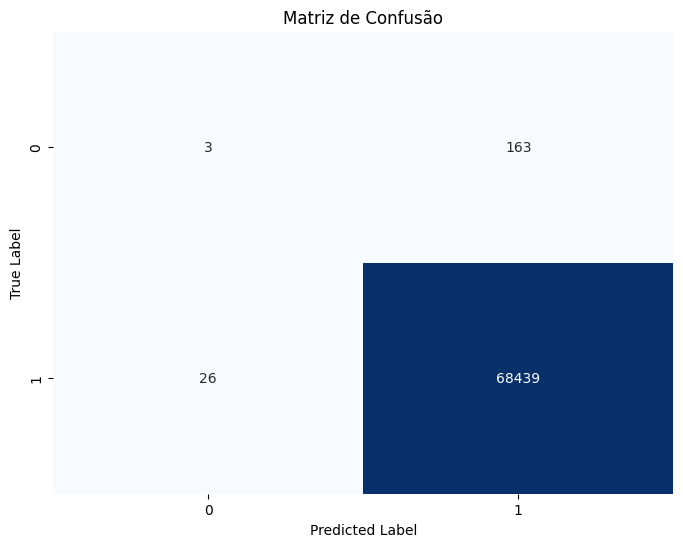

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

# Visualização da matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Gradient Boosting

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Supondo que 'resultado_normalizado' já está normalizado e disponível
# Preparação dos dados
X = resultado_normalizado.drop(columns=['KNR', 'FALHA'])  # Features: todas as colunas exceto 'KNR' e 'FALHA'
y = resultado_normalizado['FALHA']  # Target: coluna 'FALHA'

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação e treinamento do modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = gb_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9972461424137781
Classification Report:
              precision    recall  f1-score   support

         0.0       0.10      0.02      0.03       166
         1.0       1.00      1.00      1.00     68465

    accuracy                           1.00     68631
   macro avg       0.55      0.51      0.51     68631
weighted avg       1.00      1.00      1.00     68631



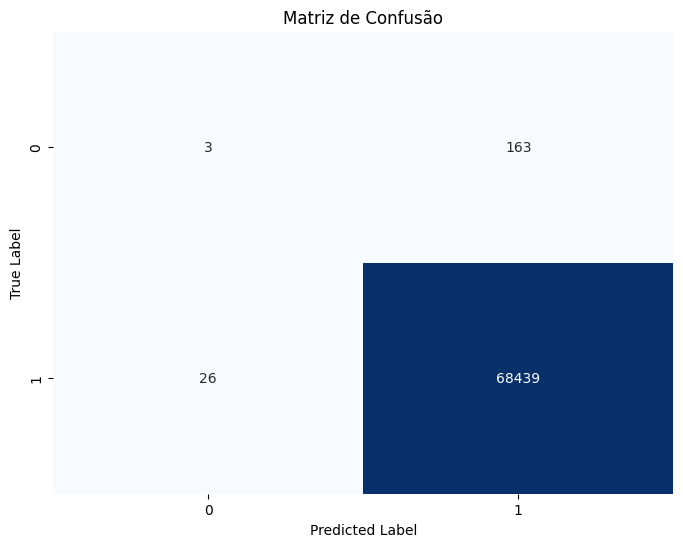

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

# Visualização da matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
# import requests

# url = 'http://127.0.0.1:8000/recebe-dados?item1=1&item2=2&item3=4'
# response = requests.request('GET', url = url)
# response.json()
import json
base = 'dados.json'

with open(base, 'r') as arquivo:
        dados = json.load(arquivo)

print(dados)

[{'item1': '1', 'item2': '2', 'item3': '4'}]
